<a href="https://colab.research.google.com/github/Alecia113/Debug/blob/main/exercise_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise
Please complete the following **two questions** E1 and E2 and and submit your **"ipynb" file to Canvas**. (You can download it using "File" > "Download .ipynb"). Please make sure all code required to run your solution properly must be included in the submission file.





##E1. Briefly describe the impact of window size selection on the Word2Vec?
Please write down your answer below with your own words. 

In [ ]:
#@Lab01 - E1

Answer = " 小的window size在单词可以互换的情况下，我们可以提高word2Vec模型的相似度。" #@param {type:"raw"}

##E2. CBOW implementation with PyTorch nn.Module and torch.optim

In the tutorial, we learned how to train a word2vec skip-gram model in pytorch with either manually updates the parameters (weights) in it or using nn.Module and torch.optim. 

In this Lab 03 E2, please:

1.   use the "NN Model (**nn.Module**)" and the "Optimiser (**torch.optim**)" (that we learned in the above sections) to train a word2vec **CBOW (NOT Skip Gram)** model  on the provided toy data with widow_size=1 and embedding_size=2. And you are also encouraged to research on **nn.Embedding** and use it in this exercise but it is not required.
2.   visualize (plot) the trained embeddings for each word in the vocabulary



Note: The embedding size should 2. The code for the preprocessing and the hyperparameter setup are provided. Have fun!


In [ ]:
'''
PyTorch nn.module 和toch.optim 实现CBOW [多到一]

我们会nn.Module 和torch.optim 来训练word2Vec skip-gram
=======

1：使用 nn.Module 和优化器 torch.optim 去训练 word2vec CBOW [这个地方变了]
window_size = 1 ; embedding_size = 2 (可研究nn.Embedding，不必要)

2plot 每个词。

潜入大小2； 提供了预处理和超参数设置的代码

'''
'''
nn.model 就是一个个转头堆成神经网络
而word2vec 就需要两个线性回归就可做出来了

linear （参数 神经元：work——size——hidden.size 到vecbolary.size)
window就是为了做中center和context的呀

'''



In [ ]:
#先回去把它给你的语句弄明白是什么意思
#看看缺的是什么
#明确这两个东西 nn.module 和torch.optim
#明确流程是哪一步
#不行先从没有隐藏层开始
#可以先听课
#回去就开始研究再研究会

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F  #add
from random import shuffle

# Raw data - sentences
# Let's create toy data for simplicity 
sentences = ["he likes cat",
             "he likes dog",
             "he likes animal",
             "dog cat animal",
             "she likes cat",
             "she dislikes dog",
             "cat likes fish",
             "cat likes milk",
             "dog likes bone",
             "dog dislikes fish",
             "dog likes milk",
             "she likes movie",
             "she likes music",
             "he likes game",
             "he likes movie",
             "cat dislikes dog"]

# convert all sentences to unique word list
word_list = " ".join(sentences).split()     #将所有句子转换为唯一单词列表  #每个单词拆出来
word_list = list(set(word_list))    #把重复的单词去掉 ，每个单词都取一个


# make dictionary so that we can reference each index of unique word
word_dict = {w: i for i, w in enumerate(word_list)}      # 制作字典，以便我们可以在dex中引用每个单词；格式为w(词)：i(序号) 

# make window size=1 for cbow
# i.e.) he likes cat
#   -> ([likes], he), ([he, cat], likes), ([likes], cat)
#   -> ([likes, likes], he), ([he, cat], likes), ([likes, likes], cat)
# Double the input when the word doesn't have two neighbours
# This will make your input have the same size, which will make it easier when you write the CBOW model code
# But this trick only works when window_size = 1

cbow = [] #不同#初始化cbow
#开始循环 在做window 跳步 
#有点迭代的感觉。
for sentence in sentences:
    sentence = sentence.split()
    for i in range(len(sentence)):
        centre = word_dict[sentence[i]]
        if i > 0 and i < len(sentence)-1:
            context = [word_dict[sentence[i - 1]], word_dict[sentence[i + 1]]]  #中间部分
        elif i == 0:
            context = [word_dict[sentence[i + 1]], word_dict[sentence[i + 1]]]  #右边1
        else:
            context = [word_dict[sentence[i - 1]], word_dict[sentence[i - 1]]]  #左边一个

        

        
        cbow.append([context, centre]) #不同

# hyperparameter
voc_size = len(word_list)#13
learning_rate = 0.1
batch_size = 16   #crossentropyloss(16*13)
embedding_size = 2
no_of_epochs = 5000




In [ ]:
cbow

In [4]:
word_dict

{'animal': 2,
 'bone': 6,
 'cat': 3,
 'dislikes': 9,
 'dog': 5,
 'fish': 11,
 'game': 7,
 'he': 10,
 'likes': 0,
 'milk': 8,
 'movie': 1,
 'music': 4,
 'she': 12}

In [ ]:
context

[8, 8]

In [ ]:
centre

5

In [ ]:
#text
cbow  #skip_grams 是两位 这里是三位多一维
'''
[[[8, 8], 1],
 [[1, 4], 8],
 '''

In [2]:
voc_size = len(word_list)       # 不重复的单词一共13; 13

def prepare_batch(data_temp):     #[[[8, 8], 4], [[9, 5], 7], [[1, 12], 8], [[8, 8], 3], [[8, 8], 11], ...] (16 items total)
  inputs = []
  labels = []


  for i in range(len(data_temp)):
    input_temp = [0]*voc_size     #让这13个不同的单词位置上都是0;#[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]s[固定]
    input_temp[data_temp[i][0][0]] = 1   # one-hot input 【？？】是指【input】【labels】么？#不确定
    inputs.append(input_temp)   # centre
    labels.append(data_temp[i][1])  #context word

  return np.array(inputs), np.array(labels)




In [ ]:
data_temp

[[[9, 9], 9],
 [[9, 9], 9],
 [[11, 0], 0],
 [[4, 3], 4],
 [[4, 0], 4],
 [[9, 9], 9],
 [[9, 9], 9],
 [[9, 9], 9],
 [[5, 3], 3],
 [[5, 1], 5],
 [[4, 10], 10],
 [[8, 8], 8],
 [[4, 5], 5],
 [[9, 9], 9],
 [[9, 9], 9],
 [[9, 9], 9]]

In [ ]:
labels = []
labels.append(data_temp[i][1])
labels

[0]

In [ ]:
  input_temp = [0]*voc_size     #让这13个不同的单词位置上都是0;#[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]s[固定]
  input_temp[data_temp[i][0][0]] = 1 
  inputs_temp

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [ ]:
#perpare for data
x_data = np.array(
    [[0,0],[1,0],[1,1],[0,0],[0,0],[0,1]])  #创建数据one-hot

x_data_torch = torch.from_numpy(x_data).float() #转类型变张量，目前还是整数

y_data = np.array([0,1,2,0,0,2]) #output
y_data_torch = torch.from_numpy(y_data) #output torch

num_features = 2 # 2个特征--hair, feather
num_classes = 3 # 3 输出类 other,mammal,bird

96

In [4]:
for ind in range(0,len(cbow),batch_size):   #ind = epoch 
    data_temp = cbow[ind: min(ind+batch_size, len(cbow))]
    inputs_temp, labels_temp = prepare_batch(data_temp)

    inputs_torch = torch.from_numpy(inputs_temp).float()    #inputs
    labels_torch = torch.from_numpy(labels_temp)  #把数组转成张量   #labels

    hidden = torch.add(torch.matmul(inputs_torch,W1),B1)#还多了个hidden = z1
    out = torch.add(torch.matmul(F.relu(hidden),Wout), Bout) #不一样是放进了激活函数


NameError: ignored

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import accuracy_score



W1 = torch.randn(voc_size, embedding_size, requires_grad=True) #输入特征，输出（隐藏侧神经元数量）
B1 = torch.randn(embedding_size, requires_grad=True) # 让隐藏层；偏移输出 候选日期的数量。即5 隐藏层中的神经元数量
# w1 （ ……num_features， num_classes， requ）
#Bout = 没隐藏的b
Wout = torch.rand(embedding_size, num_classes, requires_grad=True)#输入神经元数，输出类

Bout = torch.randn(num_classes, requires_grad=True)  #输出类3

learning_rate=0.01 #没变
no_of_epochs = 2000 # nob

for epoch in range(no_of_epochs):
  z1 = torch.add(torch.matmul(inputs_torch, W1), B1) # no 变
  Zout = torch.add(torch.matmul(F.relu(z1), Wout), Bout) #  激活函数的加和

  log_softmax = F.log_softmax(Zout,dim=1) #no大变
  loss = F.nll_loss(log_softmax, labels_torch) #no大变

  loss.backward()#nb
  with torch.no_grad():#nb
    W1.data -= learning_rate*W1.grad.data#nb
    B1.data -= learning_rate*B1.grad.data#nb
    
    Wout.data -= learning_rate*Wout.grad.data  #bian
    Bout.data -= learning_rate*Bout.grad.data  #b

  W1.grad.data.zero_()#nb
  B1.grad.data.zero_()#nb
  Wout.grad.data.zero_()#b
  Bout.grad.data.zero_()#b


  loss_sum += loss.item()

  if epoch % 500 == 499:
    print('Epoch: %d, loss: %.4f' %(epoch +1 , loss_sum))


print("Finished") #分隔




IndexError: ignored

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
from random import shuffle
import torch.optim as optim

num_classes = 1 #j

W1 = torch.randn(voc_size, embedding_size, requires_grad = True)  #还是随机生成
Wout = torch.randn(embedding_size, num_classes, requires_grad=True)  #还是随机生成

#j
B1 = torch.randn(embedding_size, requires_grad= True)
Bout = torch.randn(num_classes, requires_grad=True)

class ModelWithHiddenLayer(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(ModelWithHiddenLayer, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.linear2 = nn.Linear(hidden_size, output_size)


  def forward(self, x):
    hidden = self.linear1(x)
    out = self.linear2(F.relu(hidden))
    return out



model = ModelWithHiddenLayer(voc_size, embedding_size,num_classes)


optimiser = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(no_of_epochs):
  shuffle(cbow) #非必须
  loss_sum = 0  #非必须
#没懂在做什么
  for ind in range(0,len(cbow),batch_size):   #ind = epoch 
    data_temp = cbow[ind: min(ind+batch_size, len(cbow))]
    inputs_temp, labels_temp = prepare_batch(data_temp)

    inputs_torch = torch.from_numpy(inputs_temp).float()    #inputs
    labels_torch = torch.from_numpy(labels_temp)  #把数组转成张量   #labels

    hidden = torch.add(torch.matmul(inputs_torch,W1),B1)#还多了个hidden = z1
    out = torch.add(torch.matmul(F.relu(hidden),Wout), Bout) #不一样是放进了激活函数
    '''
    for epoch in range(no_of_epochs):
  z1 = torch.add(torch.matmul(x_data_torch, W1), B1) # no 变
  Zout = torch.add(torch.matmul(F.relu(z1), Wout), Bout) #  激活函数的加和

  '''

  '''
  加了优化器就把这改了
  criterion = nn.CrossEntropyLoss()
    log_softmax = F.log_softmax(out,dim=1) #(out,dim=1)落东西了 #out = Zout
    loss = F.nll_loss(log_softmax, labels_torch)    # labels_torch = y_data_torch
  '''

  model.train()
  optimiser.zero_grad()

  outputs = model(inputs_torch)
  log_softmax = F.log_softmax(outputs,dim=1) #(out,dim=1)落东西了 #out = Zout
  loss = F.nll_loss(log_softmax,labels_torch)    # labels_torch = y_data_torch


   #参数改了一下 output , y_target
  loss.backward()
  #j
  optimiser.step()

  with torch.no_grad():
    W1.data -= learning_rate*W1.grad.data
    Wout.data -= learning_rate*Wout.grad.data
    #j
    B1.data -= learning_rate*B1.grad.data
    Bout.data -= learning_rate*Bout.grad.data

  W1.grad.data.zero_()
  Wout.grad.data.zero_()
  #j
  B1.grad.data.zero_()
  Bout.grad.data.zero_()


  loss_sum += loss.item()

  if epoch % 500 == 499:
    print('Epoch: %d, loss: %.4f' %(epoch +1 , loss_sum))



IndexError: ignored

In [ ]:
log_softmax.shape

torch.Size([16, 1])

In [ ]:
labels_torch

tensor([ 9,  4,  4,  5,  6,  9,  5, 11,  9,  9, 10,  7,  9,  4,  5, 11])

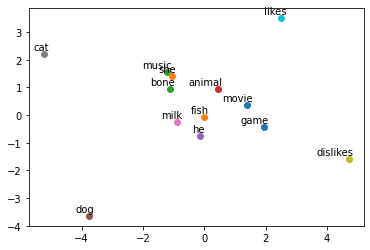

In [ ]:
trained_embeddings = W1.data.numpy()

for i, label in enumerate(word_list):  #enumerate 计算，列举
  x, y = trained_embeddings[i]   
  #print(label," : ", x, " ", y)  #非必须
  plt.scatter(x, y)
  plt.annotate(label, xy=(x, y), xytext=(5,2), ##只有前两个名字都凑到一起了，就在点附近 xytext:所有的名字都集中在这个点
               textcoords='offset points',ha= 'right',va='bottom')  #textcoords:名字又分到各自的点上了，有些点的名字改善了，能看清了
          #ha 名字在点的左上方 va 没看出来有什么变化

plt.show()

其他参考，期中得复习了

### Your Solution

In [ ]:
# Read the requirement carefully and implement the code by your own to fulfill the requirement.
# You can refer to the code from the labs
# Please try to make your code tidy with decent comments
 

### Sample Output

In [ ]:
# The sample output for model training log (only for format reference)

Epoch: 500, loss: 4.4944
Epoch: 1000, loss: 4.1465
Epoch: 1500, loss: 4.0476
Epoch: 2000, loss: 4.0518
Epoch: 2500, loss: 4.0087
Epoch: 3000, loss: 4.0032
Epoch: 3500, loss: 4.0064
Epoch: 4000, loss: 4.0014
Epoch: 4500, loss: 4.0442
Epoch: 5000, loss: 4.0085


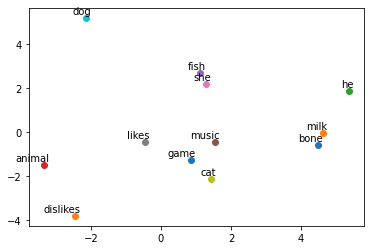

In [ ]:
# The sample output for trained embedding visualization (only for format reference)

In [ ]:
#有关gensim.models.word2vec的更多详细信息，您可以参考Gensim Word2Vec的API。
#https://radimrehurek.com/gensim/models/word2vec.html

wv_cbow_model = Word2Vec(sentences=sentences, size=100, window=5, min_count=5 , workers=2, sg=0)

'''
Word2Vec(sentences=None, corpus_file=None, size=100, alpha=0.025, window=5, 
min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, 
min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, 
hashfxn=<built-in function hash>, iter=5, null_word=0, trim_rule=None, 
sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(), max_final_vocab=None)
'''
'''
 Initialize and train a word2vec model with the following parameters:
 初始化+训练w2v模型
# sentence: iterable of iterables, i.e. the list of lists of tokens from our data
可迭代的迭代： 符号化来自我们数据的列表们的列表
# size: dimensionality of the word vectors
单词向量的维度
# window: window size
# min_count: ignores all words with total frequency lower than the specified count value
频率比具体化数值低的单词都忽略。 （忽略总频率低语指定计数值的所有单词）

# workers: Use specified number of worker threads （线程；主题）【嘶·若案·子】 to train the model (=faster training with multicore machines)

运行程序就是进程 进程中最小单位是一个线程； 一个进程有至少一个线程
清理垃圾之后再杀毒 是有顺序的，~~单线程 
#https://blog.csdn.net/csdnnews/article/details/82321777?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522161569868516780264066483%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=161569868516780264066483&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduend~default-3-82321777.first_rank_v2_pc_rank_v29&utm_term=线程
还讲了线程安全

【worker是什么含义每天搞懂】使用指定数量的worker 线程来训练模型（=使用multicore机器进行更快的训练）

# sg: training algorithm, 0 for CBOW, 1 for skip-gram
sg：训练算法，CBOW 为0 ； Skip-gram 为1
'''
#这个地方空格了后面的地方没空格

In [ ]:
similar_words = wv_cbow_model.wv.most_similar("man") #topn = 10 default (的A·佛奥·忒) 默认值
pprint.pprint(similar_words)
# The trained word vectors are stored in a KeyedVectors instance（实例） as model.wv
#训练单词向量存在KeyedVectors 实例作为model.wv ([主宾谓]训练后的词向量以model.wv的形式存在keyedvec实例中)
# Get the top 10 similar words to 'man' by calling most_similar() 
#通过calling most_similar() 得到 前十个相似单词。
#通过调用most_similar() 获取与"man"相似的前十个词
# most_similar() computes cosine similarity between a simple mean of the vectors of the given words and the vectors for each word in the model 
#他是变得。
#most_similar() 计算余弦相似度，在一个简单的被给单词的向量含义和每个在模型中向量的单词
#（计算给定的单词的向量和模型中每个单词的向量的简单均值之间的（ a simple mean of） 余弦相似度。
#【不懂】
#【值是变化的可能是获取的文件不够稳定。所有的值都是变化的。】但是频率差距不大。

In [ ]:
'''
#sg=0；；cbow 
wv_cbow_model = Word2Vec(sentences = sentences, size = 100, window = 5, min_count = 5 , workers = 2, sg = 0)
similar_words = wv_cbow_model.wv.most_similar("man") 

#sg=1；； sg 模型
wv_sg_model = Word2Vec(sentences=sentences, size=100,window=5,min_count=5,workers=2,sg=1)
similar_words=wv_sg_model.wv.most_similar("man") 

ft_sg_model = FastText(sentences,size=100,window=5,min_count=5,workers=2,sg=1)
result=ft_sg_model.wv.most_similar("electrofishing")

ft_cbow_model = FastText(sentences,size=100,window=5,min_count=5,workers=2,sg=0)
result=ft_cbow_model.wv.most_similar("electrofishing")


#就是把（）中的单词变成了K-M+W （）是变化的其他是不变的
'''



In [ ]:
'''
wv_sg_model = Word2Vec(sentences=sentences, size=100, window=5, min_count=5, workers=2, sg=1)
# KG 和CBOW不同的是sg这个参数多了 从0变1 这样就从CBOW 模型切换到SG模型了。
 #跟空格有关系吗？？没关系
 '''
 # Now we switch to a Skip Gram model by setting parameter sg=1
wv_sg_model = Word2Vec(sentences=sentences, size=100, window=5, min_count=5, workers=2, sg=1)
#不是上面是这出了问题 不是这个出了问题 与空格无关系

In [ ]:
similar_words=wv_sg_model.wv.most_similar("man") #唯一不同把调用的模型名字变了。
pprint.pprint(similar_words)

In [ ]:
import torch
from torch import nn, optim
from torch.autograd import Variable
import torch.nn.functional as F
 
CONTEXT_SIZE = 2
raw_text =  "We are about to study the idea of a computational process. Computational processes are abstract beings that inhabit computers. As they evolve, processes manipulate other abstract things called data. The evolution of a process is directed by a pattern of rules called a program. People create programs to direct processes. In effect, we conjure the spirits of the computer with our spells.".split(' ')
 
vocab=set(raw_text)
 
word_to_idx = {word:i for i,word in enumerate(vocab)}
 
data=[]
 
for i in range(CONTEXT_SIZE,len(raw_text)-CONTEXT_SIZE):
	context = [raw_text[i-2], raw_text[i-1], raw_text[i+1], raw_text[i+2]]
	target = raw_text[i]
	data.append((context,target))
 
class CBOW(nn.Module):
	def __init__(self,n_word,n_dim,context_size):
		super(CBOW,self).__init__()
		self.embedding = nn.Embedding(n_word,n_dim)
		self.linear1= nn.Linear(2*context_size*n_dim,128)
		self.linear2 = nn.Linear(128,n_word)
	def forward(self,x):
		x = self.embedding(x)
		x = x.view(1,-1)
		x = self.linear1(x)
		x = F.relu(x,inplace=True)
		x = self.linear2(x)
		x = F.log_softmax(x)
		return x
 
model = CBOW(len(word_to_idx),100,CONTEXT_SIZE)
if torch.cuda.is_available():
	model = model.cuda()
 
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=1e-3)
 
for epoch in range(1000):
    print('epoch{}'.format(epoch))
    print('*'*10)
    running_loss = 0
    for word in data:
        context,target = word
        context = Variable(torch.LongTensor([word_to_idx[i] for i in context]))
        target = Variable(torch.LongTensor([word_to_idx[target]]))
        if torch.cuda.is_available():
        	context = context.cuda()
        	target = target.cuda()
        out = model(context)
        loss = criterion(out,target)
        running_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('loss:{:.6f}'.format(running_loss/len(data)))

